<a href="https://colab.research.google.com/github/ayushiiii28/Meta-Scifor/blob/main/Pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
base_dir = !ls "/content/drive/My Drive/Pneumonia_detection/chest_xray"

In [5]:
train_dir = !ls "/content/drive/My Drive/Pneumonia_detection/chest_xray/train"
val_dir = !ls "/content/drive/My Drive/Pneumonia_detection/chest_xray/val"
test_dir = !ls "/content/drive/My Drive/Pneumonia_detection/chest_xray/test"

In [6]:
# Print the directory contents
print("Training directory contents:", train_dir)
print("Validation directory contents:", val_dir)
print("Testing directory contents:", test_dir)

Training directory contents: ['NORMAL\tPNEUMONIA']
Validation directory contents: ['NORMAL\tPNEUMONIA']
Testing directory contents: ['NORMAL\tPNEUMONIA']


In [7]:
# Importing libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Set directory paths
train_dir = "/content/drive/My Drive/Pneumonia_detection/chest_xray/train"
val_dir = "/content/drive/My Drive/Pneumonia_detection/chest_xray/val"
test_dir = "/content/drive/My Drive/Pneumonia_detection/chest_xray/test"

# Check if directories exist
print("Training directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(val_dir))
print("Testing directory exists:", os.path.exists(test_dir))

# ImageDataGenerator for Augmentation and Normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

# Flow images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

test_generator  = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = False
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)


Training directory exists: True
Validation directory exists: True
Testing directory exists: True
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


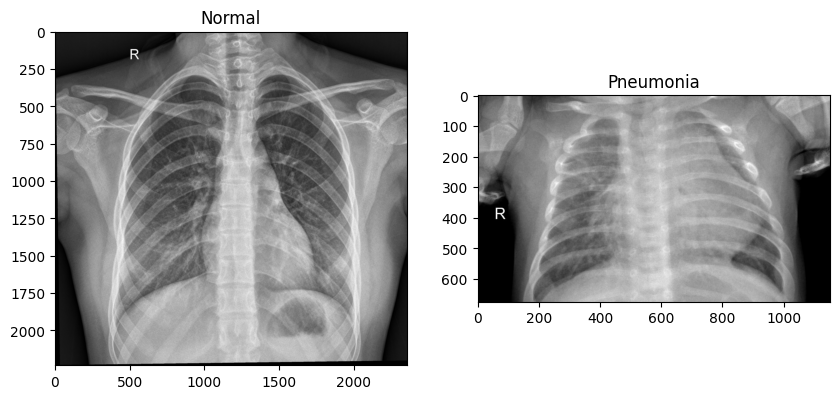

In [ ]:
# Visualize sample images
def plot_sample_images():
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    normal_image = plt.imread(os.path.join(train_dir, 'NORMAL', os.listdir(os.path.join(train_dir, 'NORMAL'))[0]))
    pneumonia_image = plt.imread(os.path.join(train_dir, 'PNEUMONIA', os.listdir(os.path.join(train_dir, 'PNEUMONIA'))[0]))
    axes[0].imshow(normal_image, cmap='gray')
    axes[0].set_title("Normal")
    axes[1].imshow(pneumonia_image, cmap='gray')
    axes[1].set_title("Pneumonia")
    plt.show()

plot_sample_images()

In [ ]:
#Model Development with VGG16 Architecture
# Create a sequential model
model_vgg16 = Sequential()

In [ ]:
# 1st Convolutional Block
# 1st Convolutional Layer
model_vgg16.add(Conv2D(filters=64, input_shape=(224,224,3), kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 2nd Convolutional Layer
model_vgg16.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# Max Pooling
model_vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 2nd Convolutional Block
# 3rd Convolutional Layer
model_vgg16.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 4th Convolutional Layer
model_vgg16.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# Max Pooling
model_vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 3rd Convolutional Block
# 5th Convolutional Layer
model_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 6th Convolutional Layer
model_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 7th Convolutional Layer
model_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# Max Pooling
model_vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 4th Convolutional Block
# 8th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 9th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 10th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# Max Pooling
model_vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 5th Convolutional Block
# 11th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 12th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 13th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# Max Pooling
model_vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Fully Connected Layers
# Flatten
model_vgg16.add(Flatten())
# FC1
model_vgg16.add(Dense(4096, activation='relu'))
model_vgg16.add(BatchNormalization())
# Adding DropOut to prevent Overfitting
model_vgg16.add(Dropout(0.5))
#FC2
model_vgg16.add(Dense(4096, activation='relu'))
model_vgg16.add(BatchNormalization())
# Adding DropOut to prevent Overfitting
model_vgg16.add(Dropout(0.5))
# Output Layer
model_vgg16.add(Dense(1, activation='sigmoid'))

In [ ]:
# Display a summary of the model vgg16 architecture, including the number of parameters in each layer
model_vgg16.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,1

 Total params: 134,314,305 (512.37 MB)

 Trainable params: 134,289,473 (512.27 MB)

 Non-trainable params: 24,832 (97.00 KB)

In [ ]:
# Compile the Model
from tensorflow.keras.optimizers import Adam
model_vgg16.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_vgg16 = model_vgg16.fit(
        train_generator,
        steps_per_epoch=10,
        epochs=10,
        validation_data=val_generator,
        validation_steps=10
    )

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 905s 87s/step - accuracy: 0.7199 - loss: 1.6354 - val_accuracy: 0.5000 - val_loss: 88.2560
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 865s 87s/step - accuracy: 0.7833 - loss: 0.7197 - val_accuracy: 0.5000 - val_loss: 215.0660
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 873s 88s/step - accuracy: 0.7827 - loss: 0.5684 - val_accuracy: 0.5000 - val_loss: 772.5957
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 866s 87s/step - accuracy: 0.7973 - loss: 0.5497 - val_accuracy: 0.5625 - val_loss: 238.0232
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 876s 88s/step - accuracy: 0.7892 - loss: 0.4777 - val_accuracy: 0.6250 - val_loss: 206.1207
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 863s 86s/step - accuracy: 0.8044 - loss: 0.5661 - val_accuracy: 0.5000 - val_loss: 59.4694
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 867s 87s/step - accuracy: 0.8403 - loss: 0.4453 - val_accuracy: 0.6875 - val_loss: 7.5600
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 865s 87s/step - accuracy: 0.8559 - loss: 0.4062 - val_ac

In [ ]:
history_vgg16.history

{'accuracy': [0.706250011920929,
  0.7718750238418579,
  0.7875000238418579,
  0.793749988079071,
  0.800000011920929,
  0.8031250238418579,
  0.8531249761581421,
  0.8500000238418579,
  0.8500000238418579,
  0.875],
 'loss': [1.4449751377105713,
  0.7754470705986023,
  0.5271346569061279,
  0.5722239017486572,
  0.5013254880905151,
  0.5841233134269714,
  0.4334372878074646,
  0.4623633027076721,
  0.47075510025024414,
  0.31388017535209656],
 'val_accuracy': [0.5,
  0.5,
  0.5,
  0.5625,
  0.625,
  0.5,
  0.6875,
  0.6875,
  0.625,
  0.5],
 'val_loss': [88.2560043334961,
  215.06597900390625,
  772.595703125,
  238.023193359375,
  206.1206512451172,
  59.469364166259766,
  7.5600152015686035,
  2.1887810230255127,
  1.3148008584976196,
  3.9686837196350098]}

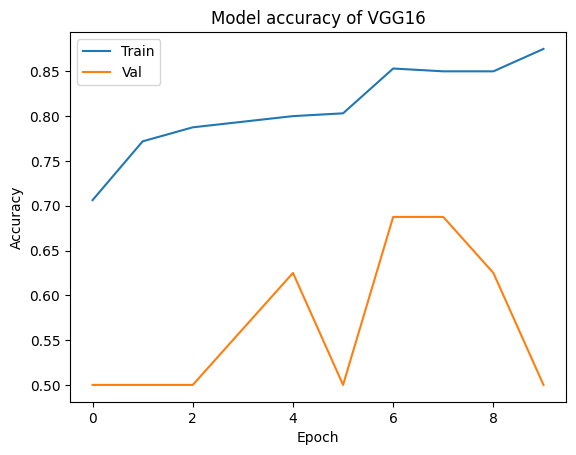

In [ ]:
#Performance Graph of VGG16
plt.plot(history_vgg16.history['accuracy'])  # Plot training accuracy
plt.plot(history_vgg16.history['val_accuracy'])  # Plot validation accuracy
plt.title('Model accuracy of VGG16')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
#Model Evaluation of VGG16
# Evaluate the model on the test set
test_loss, test_acc = model_vgg16.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 476s 24s/step - accuracy: 0.2975 - loss: 6.0782
Test Accuracy: 0.6233974099159241
Test Loss: 3.2112629413604736


20/20 ━━━━━━━━━━━━━━━━━━━━ 438s 21s/step


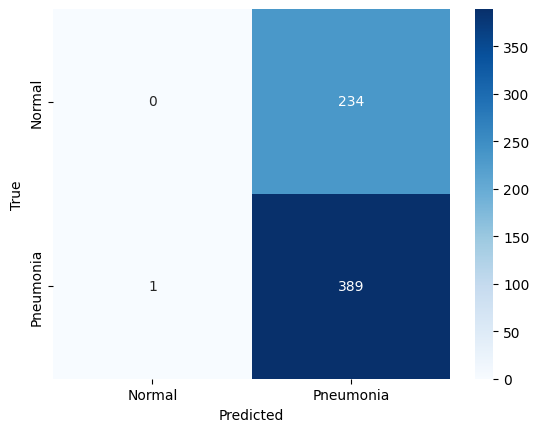

In [ ]:
# Confusion Matrix
test_predictions = model_vgg16.predict(test_generator)
test_predictions = (test_predictions > 0.5).astype(int)

cm = confusion_matrix(test_generator.classes, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Classification Report
print(classification_report(test_generator.classes, test_predictions, target_names=['NORMAL', 'PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       234
   PNEUMONIA       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



In [11]:
#Model Development with InceptionV3 Pre-Trained Architecture
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Input
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (224, 224, 3)

# Load InceptionV3 with pretrained ImageNet weights and no top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the InceptionV3 layers if desired (to not retrain them)
for layer in inception_base.layers:
    layer.trainable = False

# Create the custom top layers
x = inception_base.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Add the output layer
output = Dense(1, activation='sigmoid')(x)

# Define the final model
model_inception = Model(inputs=inception_base.input, outputs=output)

# Display the model architecture
model_inception.summary()



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 111, 111, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 111, 111, 32)   │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 111, 111, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 109, 109, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 109, 109, 32)   │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 109, 109, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 109, 109, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_98    │ (None, 109, 109, 64)   │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 109, 109, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 54, 54, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_99    │ (None, 54, 54, 80)     │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 54, 54, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 74,764,065 (285.20 MB)

 Trainable params: 52,958,209 (202.02 MB)

 Non-trainable params: 21,805,856 (83.18 MB)

In [13]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model_inception.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
history_inception = model_inception.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1350s 8s/step - accuracy: 0.8146 - loss: 0.4960 - val_accuracy: 0.9375 - val_loss: 0.2101
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1005s 6s/step - accuracy: 0.9202 - loss: 0.2241 - val_accuracy: 0.9375 - val_loss: 0.1590
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 996s 6s/step - accuracy: 0.9146 - loss: 0.2309 - val_accuracy: 0.8125 - val_loss: 0.3635
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1006s 6s/step - accuracy: 0.9329 - loss: 0.1886 - val_accuracy: 0.6250 - val_loss: 1.3246
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1010s 6s/step - accuracy: 0.9442 - loss: 0.1524 - val_accuracy: 0.9375 - val_loss: 0.2542
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 993s 6s/step - accuracy: 0.9397 - loss: 0.1532 - val_accuracy: 0.9375 - val_loss: 0.3207
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 1047s 6s/step - accuracy: 0.9438 - loss: 0.1527 - val_accuracy: 0.9375 - val_loss: 0.2902
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 993s 6s/step - accuracy: 0.9479 - loss: 0.1416 - val

In [15]:
history_inception.history

{'accuracy': [0.8711656332015991,
  0.9160276055335999,
  0.9225460290908813,
  0.933282196521759,
  0.9440184235572815,
  0.9440184235572815,
  0.9438266754150391,
  0.9436349868774414,
  0.949769914150238,
  0.9459356069564819,
  0.949386477470398,
  0.953987717628479,
  0.9520705342292786,
  0.9545629024505615,
  0.9553297758102417,
  0.9520705342292786,
  0.9557132124900818,
  0.9547545909881592,
  0.9553297758102417,
  0.9574386477470398,
  0.9574386477470398,
  0.9545629024505615,
  0.9578220844268799,
  0.9589723944664001,
  0.9549463391304016],
 'loss': [0.35657304525375366,
  0.23496782779693604,
  0.20694975554943085,
  0.18681299686431885,
  0.15070860087871552,
  0.14351855218410492,
  0.14495998620986938,
  0.1461038589477539,
  0.13404445350170135,
  0.1416252702474594,
  0.1308709681034088,
  0.12469098716974258,
  0.1315489560365677,
  0.12131045013666153,
  0.11827146261930466,
  0.12719538807868958,
  0.11012733727693558,
  0.11985994130373001,
  0.11402056366205215,


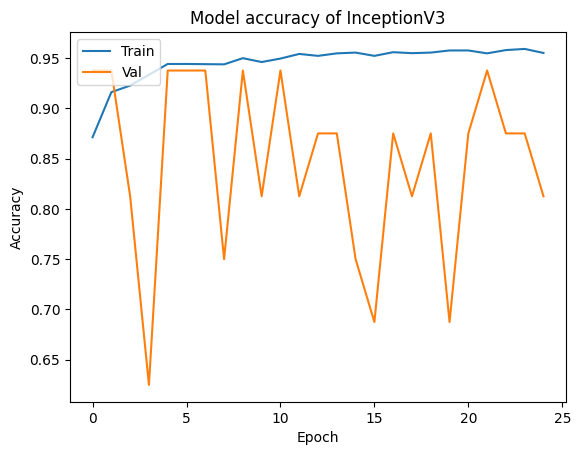

In [16]:
plt.plot(history_inception.history['accuracy'])  # Plot training accuracy
plt.plot(history_inception.history['val_accuracy'])  # Plot validation accuracy
plt.title('Model accuracy of InceptionV3')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

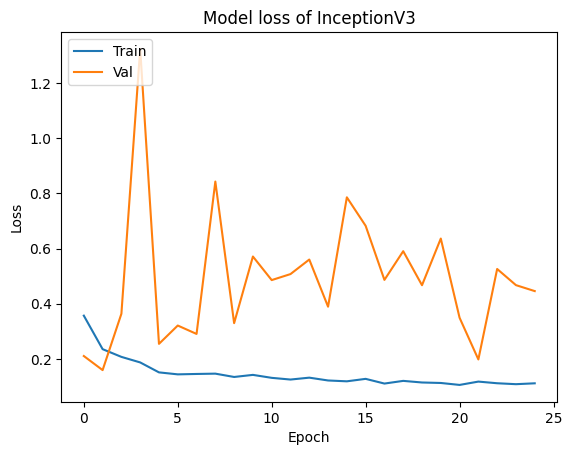

In [17]:
plt.plot(history_inception.history['loss'])  # Plot training loss
plt.plot(history_inception.history['val_loss'])  # Plot validation loss
plt.title('Model loss of InceptionV3')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [18]:
# Evaluate the model on the test data
test_loss, test_acc = model_inception.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 146s 7s/step - accuracy: 0.8082 - loss: 0.5862
Test Accuracy: 0.8814102411270142
Test Loss: 0.3641263246536255


20/20 ━━━━━━━━━━━━━━━━━━━━ 104s 5s/step


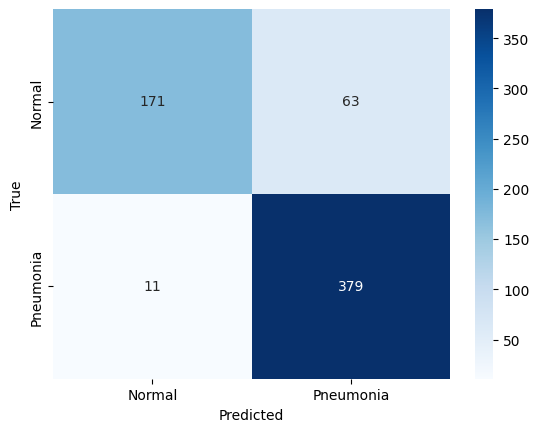

In [20]:
# Confusion Matrix
test_predictions = model_inception.predict(test_generator)
test_predictions = (test_predictions > 0.5).astype(int)

cm = confusion_matrix(test_generator.classes, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [21]:
# Classification Report
print(classification_report(test_generator.classes, test_predictions, target_names=['NORMAL', 'PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.94      0.73      0.82       234
   PNEUMONIA       0.86      0.97      0.91       390

    accuracy                           0.88       624
   macro avg       0.90      0.85      0.87       624
weighted avg       0.89      0.88      0.88       624



In [27]:
#Testing
# Load and preprocess the image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

In [28]:
#Normal Image
image_path = r"/content/drive/My Drive/Pneumonia_detection/chest_xray/test/NORMAL/IM-0016-0001.jpeg"
img = load_img(image_path, target_size=(224, 224))

In [29]:
# Convert to array and normalize pixel values
img = img_to_array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

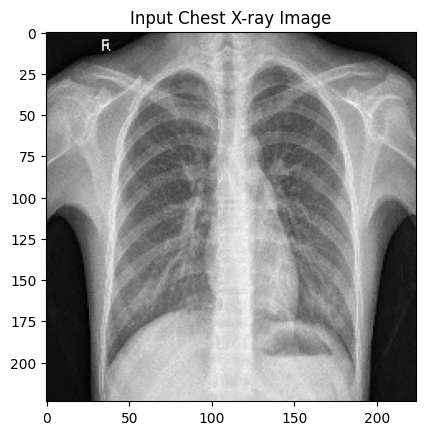

In [30]:
# Show the preprocessed image
plt.imshow(np.uint8(img[0] * 255))  # Convert back to [0, 255] range for display
plt.title('Input Chest X-ray Image')
plt.show()

In [31]:
# Make a prediction
rslt = model_inception.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [32]:
# Interpreting the result
# Assuming the model outputs 0 for NORMAL and 1 for PNEUMONIA
if rslt[0][0] > 0.5:
    prediction = "PNEUMONIA"
else:
    prediction = "NORMAL"

# Print the prediction
print(f"Prediction: {prediction}")

# Probability score
print(f"Model Output (Probability): {rslt[0][0]}")

Prediction: NORMAL
Model Output (Probability): 0.07876240462064743


In [33]:
#Pneumonia image
image_path = r"/content/drive/My Drive/Pneumonia_detection/chest_xray/test/PNEUMONIA/person1_virus_9.jpeg"
img = load_img(image_path, target_size=(224, 224))

In [34]:
# Convert to array and normalize pixel values
img = img_to_array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

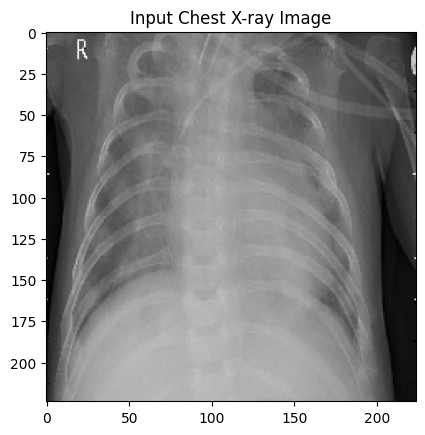

In [35]:
# Show the preprocessed image
plt.imshow(np.uint8(img[0] * 255))  # Convert back to [0, 255] range for display
plt.title('Input Chest X-ray Image')
plt.show()

In [37]:
# Make a prediction
rslt = model_inception.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


In [38]:
# Interpreting the result
# Assuming the model outputs 0 for NORMAL and 1 for PNEUMONIA
if rslt[0][0] > 0.5:
    prediction = "PNEUMONIA"
else:
    prediction = "NORMAL"

# Print the prediction
print(f"Prediction: {prediction}")

# Probability score
print(f"Model Output (Probability): {rslt[0][0]}")

Prediction: PNEUMONIA
Model Output (Probability): 0.9999977350234985


In [40]:
#Savibng the model
model_inception.save("Pneumonia Detection.keras")

In [41]:
# Load the model
model = keras.models.load_model("Pneumonia Detection.keras")

In [42]:
image_path = r"/content/drive/My Drive/Pneumonia_detection/chest_xray/test/PNEUMONIA/person1_virus_9.jpeg"
img = load_img(image_path, target_size=(224, 224))

In [43]:
# Convert to array and normalize pixel values
img = img_to_array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

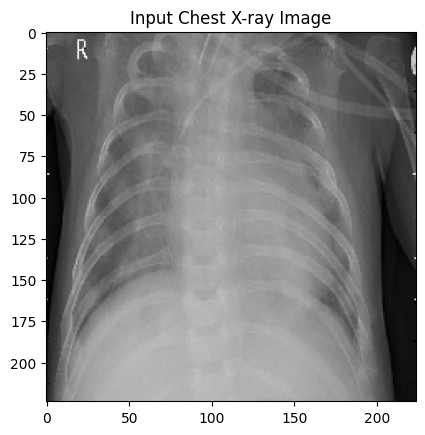

In [44]:
# Show the preprocessed image
plt.imshow(np.uint8(img[0] * 255))  # Convert back to [0, 255] range for display
plt.title('Input Chest X-ray Image')
plt.show()

In [45]:
# Make a prediction
rslt = model_inception.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


In [46]:
# Interpreting the result
# Assuming the model outputs 0 for NORMAL and 1 for PNEUMONIA
if rslt[0][0] > 0.5:
    prediction = "PNEUMONIA"
else:
    prediction = "NORMAL"

# Print the prediction
print(f"Prediction: {prediction}")

# Probability score
print(f"Model Output (Probability): {rslt[0][0]}")

Prediction: PNEUMONIA
Model Output (Probability): 0.9999977350234985


In [48]:
import pickle
# Save the training history using pickle
with open("training_history.pkl", "wb") as file:
    pickle.dump(history_inception.history, file)

In [49]:
import tensorflow as tf

# Assuming `model` is your trained model
model.save('model_name.h5')
